# Loan Default Analysis and Prediction


In [1]:
# We import the libraries we will need.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
#pd.set_option("max_rows",None)

plt.rcParams['figure.figsize'] = [10,7]

# Print multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import library to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle
# Dataset owner - Gaurav Dutta
# Date created - 2020-07-30
# The Problem Statement - To know which client is more likely to default

# We'll load the data set and create an object for it
df = pd.read_csv("./application_data.csv/application_data.csv")

In [3]:
# We take a look at the data and try to get an initial sense for it
print(f'The number of rows and columns is {df.shape}')
# Check that there are no duplicate loan applications 
print(f"The number of unique loans is: {df.SK_ID_CURR.unique().shape}")

df.head()
# Show all column names their Dtypes and count of non-null values
df.info(verbose=True,null_counts=True)

The number of rows and columns is (307511, 122)
The number of unique loans is: (307511,)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

## EDA, Data Cleaning and Preperation
### Feature space reduction

In [4]:
# We see significant variability in the number of values for each column from above
# Let's see the Percentage of null values in each column
percentNull = df.isnull().sum()*100 /len(df)
# We see a list of the top 45 columns with Null values
percentNull.sort_values(ascending = False).head(45)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [5]:
# Create an object of all the columns having null values that occupy more than 40% of the records
top_null_columns = percentNull[percentNull > 40].index
top_null_columns
# Now we will remove those columns from the dataframe
df.drop(top_null_columns, axis=1, inplace=True)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [6]:
# We will also remove the "Flag_Document" columns since they have no meaning for us
col = list(df.columns)
flag = []
for i in col:
    # The .+ symbol is used in place of * symbol (wild card)
    if re.search("FLAG_DOCUMENT.+", i): 
        flag.append(i)
df.drop(flag, axis=1, inplace=True)
#We will drop other unnecessary columns that will likely not be usefull, overcomplicate,
# and potentially cause over fitting of the model due to a complex feature space.
df.drop([
"EXT_SOURCE_3","EXT_SOURCE_2","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","DAYS_REGISTRATION","DAYS_ID_PUBLISH",
"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY",
    "LIVE_CITY_NOT_WORK_CITY","HOUR_APPR_PROCESS_START"], inplace=True, axis=1)

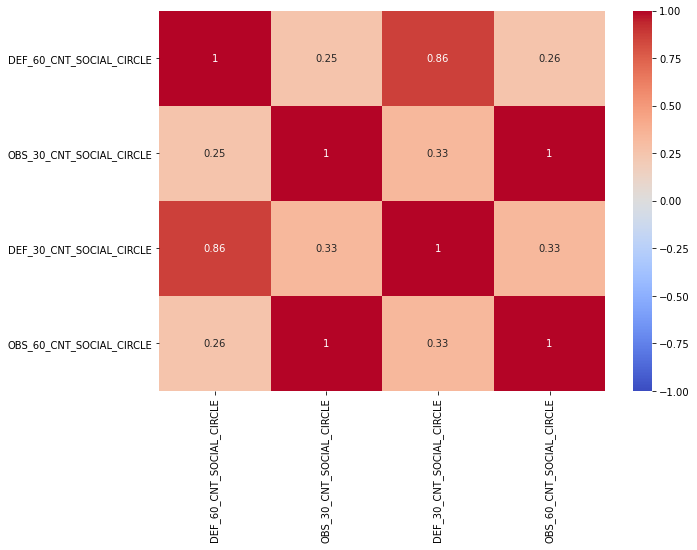

In [7]:
# Lets explore the social_circle columns to see if we need them all
Social = df[["DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE"]]
# Plot corelation of these columns
sns.heatmap(Social.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

In [8]:
# After seeing the corelations above we will drop unecessary columns
df.drop(["OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"],axis=1,inplace=True)

<AxesSubplot:>

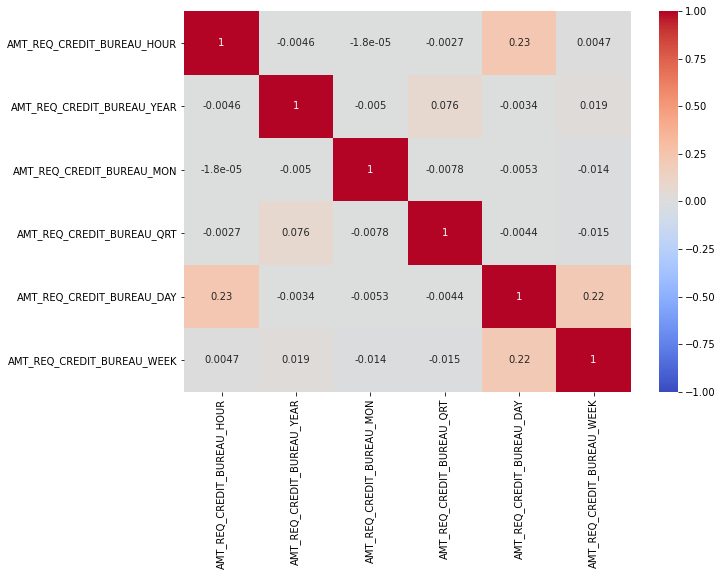

In [9]:
# Must we keep all of the Bureau columns?
# Plotting a corelation matrix for the Bureau columns 
Bureau = df[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK"]]
sns.heatmap(Bureau.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();
# We don't see significant corelation between the variables. 
# However, we will use domain knowledge and remove DAY and QRT columns since we need to reduce our feature space.
# Note that these columns were also highly skewed and correcting this would result in significant data loss
df.drop(["AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_DAY"],axis=1,inplace=True)

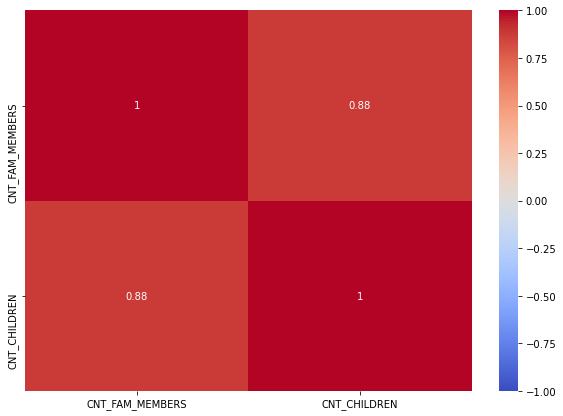

In [10]:
# Do we need the number of children and family members?
# Plotting a corelation matrix for the family and children columns 
Fam = df[["CNT_FAM_MEMBERS","CNT_CHILDREN"]]
sns.heatmap(Fam.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

In [11]:
# We see significant corelation that warrents column removal, so we will drop the count of family members column.
df.drop(["CNT_FAM_MEMBERS"],axis=1,inplace=True)

### Outlier Identification and Removal and Feature Correction

In [12]:
# Lets see some of the statistical measures of the data and get a sense for the distribution and if there are outliers
pd.set_option('display.max_columns', None)
df.describe()
pd.reset_option("max_columns")

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,2.052463,2.031521,0.015144,0.078173,1.422245,0.143421,-962.858788,0.006402,0.034362,0.267395,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,0.509034,0.502737,0.122126,0.268444,2.400989,0.446698,826.808487,0.083849,0.204685,0.916002,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,3.000000,3.000000,1.000000,1.000000,348.000000,34.000000,0.000000,4.000000,8.000000,27.000000,25.000000


In [13]:
#Exploring the children column
df.CNT_CHILDREN.value_counts()
# While it is definately possible to have 19 children, we will use domain knowledge and remove values of over 10 children
df.drop(df.CNT_CHILDREN[df.CNT_CHILDREN>=10].index,inplace=True,axis=0)
# After removing the outliers
print("After removing the children count outliers:")
df.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

After removing the children count outliers:


0    215371
1     61119
2     26749
3      3717
4       429
5        84
6        21
7         7
9         2
8         2
Name: CNT_CHILDREN, dtype: int64

We reject 454 points
A z-score of 3 corresponds to a prob of 0.27%
Skewness before: 391.557070
Kurtosis before: 191782.788849


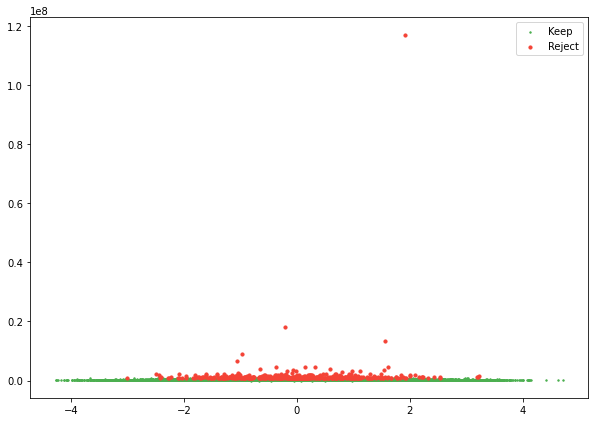

In [14]:
# We will now explore the income column and remove outliers
# Calculating mean and std for the income column
mean, std = np.mean(df.AMT_INCOME_TOTAL), np.std(df.AMT_INCOME_TOTAL)
# Calculating the z-score for each data point (how far in STDs is each data point from the mean).
z_score = np.abs((df.AMT_INCOME_TOTAL - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 3
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.AMT_INCOME_TOTAL.size)
plt.scatter(visual_scatter[keep], df.AMT_INCOME_TOTAL[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.AMT_INCOME_TOTAL[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# Print skewness and kurtosis
print(f"Skewness before: %f" % df.AMT_INCOME_TOTAL.skew())
print(f"Kurtosis before: %f" % df.AMT_INCOME_TOTAL.kurt())
# We will now drop the selected rejected  data points
df.drop(df.AMT_INCOME_TOTAL[~keep].index,inplace=True, axis=0)
plt.show();

We reject 294 points
A z-score of 6 corresponds to a prob of 0.000%
Skewness after: 1.717716
Kurtosis after: 4.870102


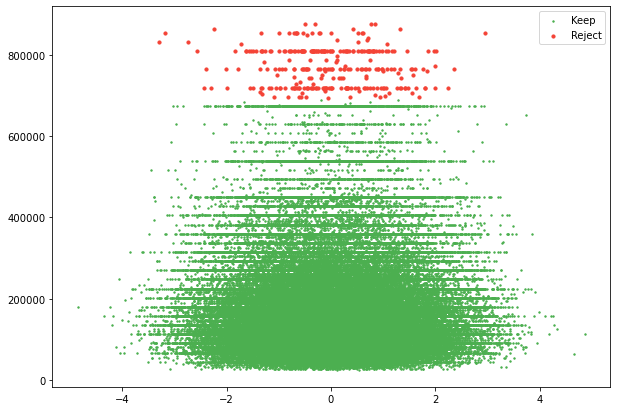

In [15]:
# Calculating mean and std for the income column
mean, std = np.mean(df.AMT_INCOME_TOTAL), np.std(df.AMT_INCOME_TOTAL)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.AMT_INCOME_TOTAL - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 6
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calculating the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 6 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.3f}%")
# Visualizing the outliers
visual_scatter = np.random.normal(size=df.AMT_INCOME_TOTAL.size)
plt.scatter(visual_scatter[keep], df.AMT_INCOME_TOTAL[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.AMT_INCOME_TOTAL[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# We will now drop the selected rejected  data points
df.drop(df.AMT_INCOME_TOTAL[~keep].index,inplace=True, axis=0)
# Print skewness and kurtosis after cleaning
print(f"Skewness after: %f" % df.AMT_INCOME_TOTAL.skew())
print(f"Kurtosis after: %f" % df.AMT_INCOME_TOTAL.kurt())
# We will not drop anymore values since this will cause significant dataset reduction
# People with very high anual incomes are less likely to default on a loan and may skew the model 
plt.show();

In [16]:
# Reengineer the DAYS_BIRTH column to show age of client in years.
df.DAYS_BIRTH = df.DAYS_BIRTH / -365
df.rename(columns={"DAYS_BIRTH":"AGE"},inplace=True)
# Makeing sure no values were corrupted.
len(df.AGE[df.AGE < 0])
df.AGE

0

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE, Length: 306753, dtype: float64

In [17]:
# Reengineer the DAYS_EMPLOYED column to show clients employment period in years.
df.DAYS_EMPLOYED = (np.abs(df.DAYS_EMPLOYED) / 365)
df.rename(columns={"DAYS_EMPLOYED":"YEARS_EMPLOYED"},inplace=True)
# Lets explore outliers and see how many rows are over 60 years of employment.
len(df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 60])
df.YEARS_EMPLOYED

55337

0            1.745205
1            3.254795
2            0.616438
3            8.326027
4            8.323288
             ...     
307506       0.646575
307507    1000.665753
307508      21.701370
307509      13.112329
307510       3.457534
Name: YEARS_EMPLOYED, Length: 306753, dtype: float64

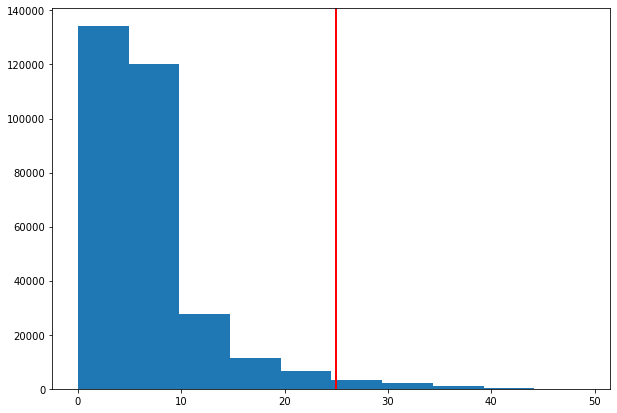

In [18]:
# We see thusands of rows with the employment period of 1000.665 years. Lets replace those with the median.
df.YEARS_EMPLOYED.loc[df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 1000].index] = df.YEARS_EMPLOYED.median()
# Plotting the distribution of the employment period column
plt.hist(df.YEARS_EMPLOYED)
plt.axvline(x=25,  linewidth=2, color='red')
# We will clean by inspection and remove data points of over 25 years employed
df.drop(df.YEARS_EMPLOYED[df.YEARS_EMPLOYED > 25].index,inplace=True, axis=0)
plt.show();

We reject 1835 points
A z-score of 7 corresponds to a prob of 0.0000573%
Skewness before: 12.334634
Kurtosis before: 1452.753848


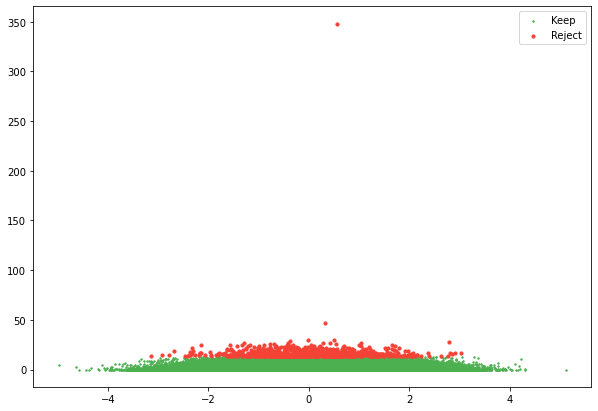

In [19]:
# Calculating mean and std for the SOCIAL_CIRCLE column
mean, std = np.mean(df.OBS_30_CNT_SOCIAL_CIRCLE), np.std(df.OBS_30_CNT_SOCIAL_CIRCLE)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.OBS_30_CNT_SOCIAL_CIRCLE - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 5
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 7 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.7f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.OBS_30_CNT_SOCIAL_CIRCLE.size)
plt.scatter(visual_scatter[keep], df.OBS_30_CNT_SOCIAL_CIRCLE[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.OBS_30_CNT_SOCIAL_CIRCLE[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# Print skewness and kurtosis
print(f"Skewness before: %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis before: %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.kurt())
# We will now drop the selected rejected  data points
df.drop(df.OBS_30_CNT_SOCIAL_CIRCLE[~keep].index,inplace=True, axis=0)
plt.show();

We reject 395 points
A z-score of 5 corresponds to a prob of 0.000057%
Skewness after (OBS): 2.042580
Kurtosis after (OBS): 4.389330
Skewness after (DEF): 3.829405
Kurtosis after (DEF): 18.680353


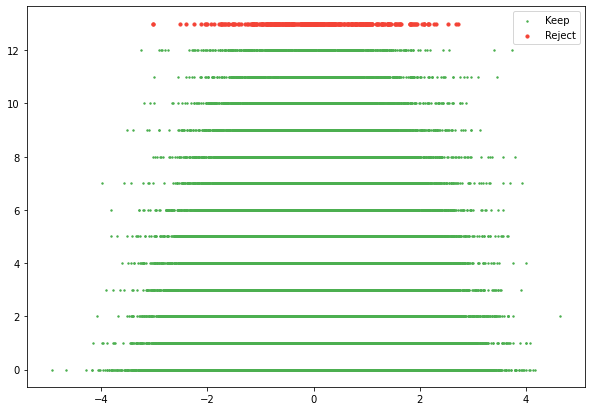

In [20]:
# Calculating mean and std for the SOCIAL_CIRCLE column
mean, std = np.mean(df.OBS_30_CNT_SOCIAL_CIRCLE), np.std(df.OBS_30_CNT_SOCIAL_CIRCLE)
# Calculating the z-score for each data point (how far in STD is each data point from the mean).
z_score = np.abs((df.OBS_30_CNT_SOCIAL_CIRCLE - mean) / std)
# Our threshold for how many STDs from the mean we keep
threshold = 5
keep = z_score < threshold
# How many data points are we rejecting
print(f"We reject {(~keep).sum()} points")
# Calc the probability corresponding to the selected z-score threshold
from scipy.stats import norm
print(f"A z-score of 5 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.6f}%")
# Visualize the outliers
visual_scatter = np.random.normal(size=df.OBS_30_CNT_SOCIAL_CIRCLE.size)
plt.scatter(visual_scatter[keep], df.OBS_30_CNT_SOCIAL_CIRCLE[keep], s=2, label="Keep", color="#4CAF50")
plt.scatter(visual_scatter[~keep],df.OBS_30_CNT_SOCIAL_CIRCLE[~keep], s=10, label="Reject", color="#F44336")
plt.legend()
# We will now drop the selected rejected  data points
df.drop(df.OBS_30_CNT_SOCIAL_CIRCLE[~keep].index,inplace=True, axis=0)
# Print skewness and kurtosis after cleaning. It is significantly better
print(f"Skewness after (OBS): %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis after (OBS): %f" % df.OBS_30_CNT_SOCIAL_CIRCLE.kurt())
print(f"Skewness after (DEF): %f" % df.DEF_30_CNT_SOCIAL_CIRCLE.skew())
print(f"Kurtosis after (DEF): %f" % df.DEF_30_CNT_SOCIAL_CIRCLE.kurt())
plt.show();

In [21]:
# Reengineer the DAYS_LAST_PHONE_CHANGE column to show in days.
df.DAYS_LAST_PHONE_CHANGE = np.abs(df.DAYS_LAST_PHONE_CHANGE)
df.DAYS_LAST_PHONE_CHANGE

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 298220, dtype: float64

In [22]:
# Lets review the Credit Bureau columns for skewness and kurtosis
print(f"Skewness Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.skew())
print(f"Kurtosis Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.kurt())

print(f"Skewness Year: %f" % df.AMT_REQ_CREDIT_BUREAU_YEAR.skew())
print(f"Kurtosis Year: %f" % df.AMT_REQ_CREDIT_BUREAU_YEAR.kurt())

print(f"Skewness Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.skew())
print(f"Kurtosis Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.kurt())

print(f"Skewness Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.skew())
print(f"Kurtosis Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.kurt())
# Could be worse, but lets try to clean the Hour, Week, and Month columns

Skewness Month: 7.811587
Kurtosis Month: 90.828417
Skewness Year: 1.242097
Kurtosis Year: 1.969920
Skewness Hour: 14.560941
Kurtosis Hour: 255.717353
Skewness Week: 9.316983
Kurtosis Week: 168.005612


In [23]:
# Cleaning the Bureau columns by inspection
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()
df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()

df.drop(df.AMT_REQ_CREDIT_BUREAU_HOUR[df.AMT_REQ_CREDIT_BUREAU_HOUR >=2].index,inplace=True, axis=0)
df.drop(df.AMT_REQ_CREDIT_BUREAU_WEEK[df.AMT_REQ_CREDIT_BUREAU_WEEK >=4].index,inplace=True, axis=0)
df.drop(df.AMT_REQ_CREDIT_BUREAU_MON[df.AMT_REQ_CREDIT_BUREAU_MON >=14].index,inplace=True, axis=0)

0.0    256035
1.0      1512
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

0.0    249316
1.0      7978
2.0       195
3.0        54
4.0        34
6.0        20
5.0         9
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

0.0     215284
1.0      32145
2.0       5196
3.0       1906
4.0       1024
5.0        571
6.0        324
7.0        284
9.0        201
8.0        180
10.0       128
11.0       115
12.0        72
13.0        65
14.0        38
15.0        34
16.0        22
17.0        12
18.0         6
19.0         2
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [24]:
# Lets review the Credit Bureau columns for skewness and kurtosis after our data cleaning
print(f"Skewness Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.skew())
print(f"Kurtosis Month: %f" % df.AMT_REQ_CREDIT_BUREAU_MON.kurt())

print(f"Skewness Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.skew())
print(f"Kurtosis Hour: %f" % df.AMT_REQ_CREDIT_BUREAU_HOUR.kurt())

print(f"Skewness Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.skew())
print(f"Kurtosis Week: %f" % df.AMT_REQ_CREDIT_BUREAU_WEEK.kurt())
# Alright, that is a bit better. Its all about the comprise to maintain dataset size

Skewness Month: 6.816295
Kurtosis Month: 66.086669
Skewness Hour: 12.940026
Kurtosis Hour: 165.445563
Skewness Week: 6.040176
Kurtosis Week: 42.148249


In [25]:
# Reengineer the gender column
df.CODE_GENDER.value_counts()
# Replace the null values with the mode
df.CODE_GENDER[df.CODE_GENDER == "XNA"] = "F"
# Converting F and M to 0 and 1
df.CODE_GENDER.replace({"M": "0", "F": "1"}, inplace=True)
# Convert numeric columns to the appropriate Dtype
df.CODE_GENDER = df.CODE_GENDER.apply(pd.to_numeric, errors='ignore')
# Confirming the changes
df.CODE_GENDER.value_counts()
print(f"The Gender column Dtype is: {df.CODE_GENDER.dtypes}")

F      195422
M      102541
XNA         3
Name: CODE_GENDER, dtype: int64

1    195425
0    102541
Name: CODE_GENDER, dtype: int64

The Gender column Dtype is: int64


In [26]:
# Convert binary strings in Own Real Estate, Contract Type, and Car to 0 and 1
df.FLAG_OWN_CAR.replace({"N": 0, "Y": 1}, inplace=True)
df.FLAG_OWN_REALTY.replace({"N": 0, "Y": 1}, inplace=True)
df.NAME_CONTRACT_TYPE.replace({"Cash loans":0,"Revolving loans":1},inplace=True)
# Convert numeric columns to the appropriate Dtype
df.FLAG_OWN_REALTY = df.FLAG_OWN_CAR.apply(pd.to_numeric, errors='ignore')
df.FLAG_OWN_CAR = df.FLAG_OWN_REALTY.apply(pd.to_numeric, errors='ignore')
df.NAME_CONTRACT_TYPE = df.FLAG_OWN_REALTY.apply(pd.to_numeric, errors='ignore')
# Confirming changes
df.FLAG_OWN_REALTY.value_counts()
df.FLAG_OWN_CAR.value_counts()
df.NAME_CONTRACT_TYPE.value_counts()
print(f"The Own Realty column Dtype is: {df.FLAG_OWN_REALTY.dtypes}")
print(f"The Own Car column Dtype is: {df.FLAG_OWN_CAR.dtypes}")
print(f"The Contract Type column Dtype is: {df.NAME_CONTRACT_TYPE.dtypes}")

0    196319
1    101647
Name: FLAG_OWN_REALTY, dtype: int64

0    196319
1    101647
Name: FLAG_OWN_CAR, dtype: int64

0    196319
1    101647
Name: NAME_CONTRACT_TYPE, dtype: int64

The Own Realty column Dtype is: int64
The Own Car column Dtype is: int64
The Contract Type column Dtype is: int64


In [27]:
# Now lets see how we are doing for general distribution and outliers
pd.set_option('display.max_columns', None)
df.describe()
pd.reset_option("max_columns")
# That is so much better

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,2.979660e+05,297954.000000,2.976960e+05,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.000000,297966.00000,297966.000000,297965.000000,257359.000000,257359.000000,257359.000000,257359.000000
mean,278190.485482,0.081885,0.341136,0.655863,0.341136,0.341136,0.423011,165927.245138,5.964180e+05,27026.613680,5.357279e+05,0.020817,43.735714,5.938902,2.054030,2.033057,0.015384,0.079845,1.36430,0.142103,960.172477,0.005867,0.033121,0.258852,1.903015
std,102790.320569,0.274190,0.474092,0.475087,0.474092,0.474092,0.722119,85476.250521,3.997139e+05,14278.164272,3.665442e+05,0.013787,11.974868,4.626902,0.508644,0.502428,0.123076,0.271053,2.13008,0.438636,825.469721,0.076373,0.186544,0.847626,1.869227
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,20.517808,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189121.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112500.000000,2.700000e+05,16515.000000,2.385000e+05,0.010006,33.797260,2.504110,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,273.000000,0.000000,0.000000,0.000000,0.000000
50%,278233.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,144000.000000,5.120640e+05,24885.000000,4.500000e+05,0.018850,42.756164,5.868493,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,754.000000,0.000000,0.000000,0.000000,1.000000
75%,367126.750000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,202500.000000,8.086500e+05,34587.000000,6.795000e+05,0.028663,53.736986,7.205479,2.000000,2.000000,0.000000,0.000000,2.00000,0.000000,1566.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,690399.000000,4.050000e+06,225000.000000,4.050000e+06,0.072508,69.120548,25.000000,3.000000,3.000000,1.000000,1.000000,12.00000,6.000000,4292.000000,1.000000,3.000000,13.000000,25.000000


### Removing Null Values

In [28]:
# This is the dataset shape now
df.shape
# We will look at the remaining columns and the percentage of Null records in them
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(15)

(297966, 33)

OCCUPATION_TYPE               31.664687
AMT_REQ_CREDIT_BUREAU_YEAR    13.628065
AMT_REQ_CREDIT_BUREAU_WEEK    13.628065
AMT_REQ_CREDIT_BUREAU_HOUR    13.628065
AMT_REQ_CREDIT_BUREAU_MON     13.628065
NAME_TYPE_SUITE                0.422531
AMT_GOODS_PRICE                0.090614
AMT_ANNUITY                    0.004027
DAYS_LAST_PHONE_CHANGE         0.000336
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
NAME_EDUCATION_TYPE            0.000000
FLAG_OWN_CAR                   0.000000
dtype: float64

# 
We see that 31% of the occupation_type is null. There is no reasonable way to impute this without creating significant distortions. Several plausable imputations can be thought of, but are too risky. Therefore, we will fill the null values with "unknown," since the nulls may be unemployed, pensioners, or just errors. 

In [29]:
# Filling the null values in the occupation_type column
df["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)

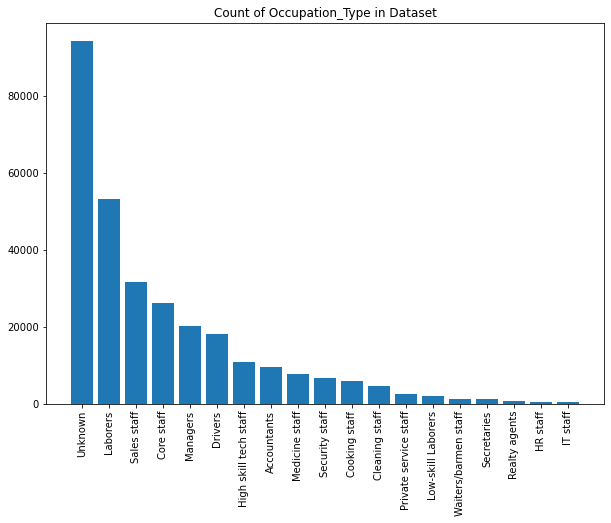

In [30]:
# Lets visualize and explore the OCCUPATION_TYPE column
occupationCount = df.OCCUPATION_TYPE.value_counts()
occupationCount = occupationCount.to_frame().reset_index()
occupationCount.rename(columns={"index":"OCCUPATION_TYPE","OCCUPATION_TYPE":"VALUE_COUNTS"})

plt.bar(occupationCount.iloc[:,0],occupationCount.iloc[:,1])
plt.xticks(rotation=90)
plt.title("Count of Occupation_Type in Dataset")
plt.show();

In [31]:
# We will now look at the rest of the top columns with null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    13.628065
AMT_REQ_CREDIT_BUREAU_WEEK    13.628065
AMT_REQ_CREDIT_BUREAU_HOUR    13.628065
AMT_REQ_CREDIT_BUREAU_MON     13.628065
NAME_TYPE_SUITE                0.422531
AMT_GOODS_PRICE                0.090614
AMT_ANNUITY                    0.004027
DAYS_LAST_PHONE_CHANGE         0.000336
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
dtype: float64

#
As we can see, the 6 AMT_REQ_CREDIT_BUREAU columns which list the number of enquiries to the Credit Bureau about the client, X time before the application, all have the same percentage of values as null. We will therefore look at the values and their count in these columns and see if we can get a better understanding.

In [32]:
# Looking at values and their count in the AMT_REQ_CREDIT_BUREAU coulmns
# Note that all columns had 0 as the most common value. (Commented out for sapce)

df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    255849
1.0      1510
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#
Zero is the most common value in all columns. This means that the person has not had a credit check in the last period and that this lending institution is likely the first place the person is going to for a loan. Because it is the mode, and since sometimes null is conflated with zero in datasets, we will fill all these null values with zero.

In [33]:
# Filling the null values in the AMT_REQ_CREDIT_BUREAU columns
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)

In [34]:
# We will now look again at the top columns with Null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

NAME_TYPE_SUITE               0.422531
AMT_GOODS_PRICE               0.090614
AMT_ANNUITY                   0.004027
DAYS_LAST_PHONE_CHANGE        0.000336
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
AMT_INCOME_TOTAL              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_INCOME_TYPE              0.000000
AMT_CREDIT                    0.000000
CNT_CHILDREN                  0.000000
dtype: float64

#
We see that the highest percentage of null values is 0.41% of null values. While statistical imputation methods could be applied to eliminate the null values, this would require further exploration for each column. Since we have more than enough records in this dataset for our purposes, we will just drop all records with null values for the remaining columns with minimal effect on the dataset size.

In [35]:
# Taking initial dataset shape before removing null records
before = df.shape
# Removing null records from dataset
df.dropna(axis=0, how='any',inplace=True)
# Taking dataset shape after removing null records to determine how much was lost
after = df.shape
# Calculating and printing how many records were dropped
lost = (before[0])-(after[0])
print(f"We lost {lost} records from the dataset and our new dataset shape is: {after}")

We lost 1272 records from the dataset and our new dataset shape is: (296694, 33)


In [36]:
# Now we take a look at the remaining columns, their Dtype, and see that there are no more Null values 
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296694 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   296694 non-null  int64  
 1   TARGET                       296694 non-null  int64  
 2   NAME_CONTRACT_TYPE           296694 non-null  int64  
 3   CODE_GENDER                  296694 non-null  int64  
 4   FLAG_OWN_CAR                 296694 non-null  int64  
 5   FLAG_OWN_REALTY              296694 non-null  int64  
 6   CNT_CHILDREN                 296694 non-null  int64  
 7   AMT_INCOME_TOTAL             296694 non-null  float64
 8   AMT_CREDIT                   296694 non-null  float64
 9   AMT_ANNUITY                  296694 non-null  float64
 10  AMT_GOODS_PRICE              296694 non-null  float64
 11  NAME_TYPE_SUITE              296694 non-null  object 
 12  NAME_INCOME_TYPE             296694 non-null  object 
 13 

In [37]:
# Spliting up the dataset based on if the client defualted on the loan or not
dfDefualt = df[df["TARGET"] == 1]
dfNoDefualt = df[df["TARGET"] == 0]
print(f"Number of clients who defualted on the loan: {dfDefualt.TARGET.count()}")
print(f"Number of clients who did not defualt on the loan: {dfNoDefualt.TARGET.count()}")

Number of clients who defualted on the loan: 24329
Number of clients who did not defualt on the loan: 272365


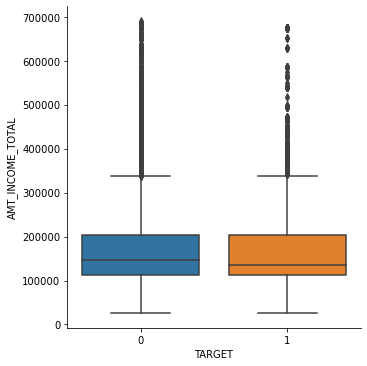

In [38]:
# Plot the income and the target outcomes
# We can see that those who default have slightly lower incomes on average
sns.catplot(x = "TARGET", y = "AMT_INCOME_TOTAL", data = df,  kind="box")
plt.show();

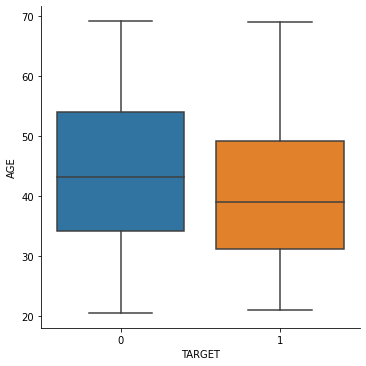

In [39]:
# Plot the Age and the target outcomes
# We can see that those who default are more often younger on average
sns.catplot(x = "TARGET", y = "AGE", data = df,  kind="box")
plt.show();

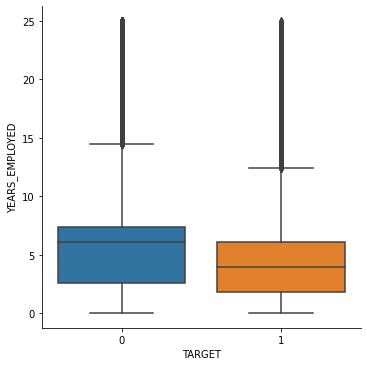

In [40]:
# Plot the Years Employed and the target outcomes
# We can see that those who default have a shorter employment period on average
sns.catplot(x = "TARGET", y = "YEARS_EMPLOYED", data = df, kind="box")
plt.show();

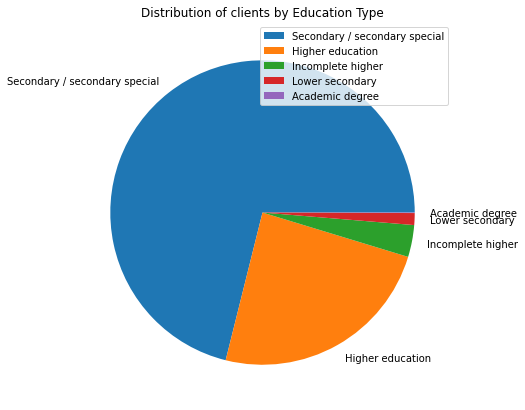

In [74]:
# Look at distribution of clients by education type
plt.pie(df.NAME_EDUCATION_TYPE.value_counts(),labels = df.NAME_EDUCATION_TYPE.unique(),)
plt.legend()
plt.title("Distribution of clients by Education Type")
plt.show();

In [42]:
# Create a list of all the Catagorical features and a list of all the numerical/ features
cat = list(df.select_dtypes(["object"]).columns)
num = list(df.select_dtypes(["float64","int64"]).columns)
print("Number of numerical columns: "+ str(len(num)))
print("Number of categorical columns: " +str(len(cat)))

Number of numerical columns: 25
Number of categorical columns: 8


In [43]:
cat

['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [44]:
df.NAME_CONTRACT_TYPE.value_counts()


0    195453
1    101241
Name: NAME_CONTRACT_TYPE, dtype: int64

In [45]:
df.NAME_CONTRACT_TYPE.unique()
df.NAME_TYPE_SUITE.unique()
df.NAME_INCOME_TYPE.unique()
df.NAME_EDUCATION_TYPE.unique()
df.NAME_HOUSING_TYPE.unique()
df.OCCUPATION_TYPE.unique()
df.WEEKDAY_APPR_PROCESS_START.unique()
f.ORGANIZATION_TYPE.unique()



array([0, 1], dtype=int64)

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Unknown',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

array(['WEDNESDAY', 'MONDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY', 'FRIDAY',
       'TUESDAY'], dtype=object)

NameError: name 'f' is not defined

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# # X, y = df(return_X_y=True)

# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [ ]:
# Check the correlation between all variables
# There are some highly correlated variables
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.show();

In [ ]:
# defining our variables
X = df.iloc[:,6:10]
y = df.iloc[:,1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
def metrix_report(y_test, y_pred):
    from sklearn.metrics import classification_report

    target_names = ["class 0", "class 1"]
    return classification_report(y_test, y_pred, target_names=target_names)
metrix_report(y_test, y_pred)

In [ ]:
def metrix_report(y_test, y_pred):
    from sklearn.metrics import classification_report

    target_names = ["class 0", "class 1"]
    return classification_report(y_test, y_pred, target_names=target_names)
metrix_report(y_test, y_pred)

In [ ]:
(68693 +219)/(68693 + 1454 +5931+ 219)*100

In [ ]:
X
y

Don't do forward fill because oit may be dependant on other features.

Fill with zero the rest of bureau
Fill with unknown or unemployed the occupation nulls